

Install: 
- devtools::install_github(repo = "ncborcherding/scRepertoire")
- remotes::install_github(repo = "ncborcherding/scRepertoire", ref = "dev")


Please not use, as it might not include some functions: 
- https://anaconda.org/bioconda/bioconductor-screpertoire
- https://anaconda.org/conda-forge/r-seurat



under construction

-Combine TCR/BCR data from multiple samples (if you have more than one). 

-Integrate with single-cell RNA-seq data (if you have scRNA-seq data available).

-Visualize clonal diversity and clonal expansion.

-Analyze clonotype tracking across conditions or time points.

-Explore repertoire overlap between samples.

-Advanced analysis such as gene usage and TCR/BCR annotation.

https://github.com/ncborcherding/scRepertoire?tab=readme-ov-file
https://www.borch.dev/uploads/screpertoire/



In [1]:
library(scRepertoire)
library(Seurat)

Loading required package: ggplot2

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




## using standard data of the package

In [4]:
data("contig_list") #the data built into scRepertoire
head(contig_list[[1]])

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,AAACCTGAGTACGACG-1,True,AAACCTGAGTACGACG-1_contig_1,True,500,TRA,TRAV25,None,TRAJ20,TRAC,True,True,CGCSNDYKLSF,TGTGGGTGTTCTAACGACTACAAGCTCAGCTTT,8344,4,clonotype123,clonotype123_consensus_2
2,AAACCTGAGTACGACG-1,True,AAACCTGAGTACGACG-1_contig_2,True,478,TRB,TRBV5-1,None,TRBJ2-7,TRBC2,True,True,CASSLTDRTYEQYF,TGCGCCAGCAGCTTGACCGACAGGACCTACGAGCAGTACTTC,65390,38,clonotype123,clonotype123_consensus_1
4,AAACCTGCAACACGCC-1,True,AAACCTGCAACACGCC-1_contig_1,True,506,TRA,TRAV38-2/DV8,None,TRAJ52,TRAC,True,True,CAYRSAQAGGTSYGKLTF,TGTGCTTATAGGAGCGCGCAGGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,18372,8,clonotype124,clonotype124_consensus_1
5,AAACCTGCAACACGCC-1,True,AAACCTGCAACACGCC-1_contig_2,True,470,TRB,TRBV10-3,None,TRBJ2-2,TRBC2,True,True,CAISEQGKGELFF,TGTGCCATCAGTGAACAGGGGAAAGGGGAGCTGTTTTTT,34054,9,clonotype124,clonotype124_consensus_2
6,AAACCTGCAGGCGATA-1,True,AAACCTGCAGGCGATA-1_contig_1,True,558,TRA,TRAV12-1,None,TRAJ9,TRAC,True,True,CVVSDNTGGFKTIF,TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT,5018,2,clonotype1,clonotype1_consensus_2
7,AAACCTGCAGGCGATA-1,True,AAACCTGCAGGCGATA-1_contig_2,True,505,TRB,TRBV9,None,TRBJ2-2,TRBC2,True,True,CASSVRRERANTGELFF,TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT,25110,11,clonotype1,clonotype1_consensus_1


In [3]:

# Combine TCR/BCR data from multiple samples
# Assuming each element in contig_list corresponds to a sample
combined_tcr <- combineTCR(contig_list, samples = c("Sample1", "Sample2", "Sample3"))

# View the combined TCR/BCR data
# head(combined_tcr[[1]]$sample)


In [4]:
unique(combined_tcr[[1]]$sample)

[1] "Sample1"

In [5]:
# View the structure of the combined data
# str(combined_tcr)

# Preview the first few rows
head(str(combined_tcr))


List of 6
 $ Sample1:'data.frame':	3208 obs. of  13 variables:
  ..$ barcode : chr [1:3208] "Sample1_AAACCTGAGAGCTGGT" "Sample1_AAACCTGAGCATCATC" "Sample1_AAACCTGAGTGGTCCC" "Sample1_AAACCTGCAAACGCGA" ...
  ..$ sample  : chr [1:3208] "Sample1" "Sample1" "Sample1" "Sample1" ...
  ..$ TCR1    : chr [1:3208] NA "TRAV12-1.TRAJ37.TRAC" NA "TRAV29DV5.TRAJ22.TRAC" ...
  ..$ cdr3_aa1: chr [1:3208] NA "CVVNDEGSSNTGKLIF" NA "CAASGYGSARQLTF" ...
  ..$ cdr3_nt1: chr [1:3208] NA "TGTGTGGTGAACGATGAAGGCTCTAGCAACACAGGCAAACTAATCTTT" NA "TGTGCAGCAAGCGGTTACGGTTCTGCAAGGCAACTGACCTTT" ...
  ..$ TCR2    : chr [1:3208] "TRBV20-1.TRBD1.TRBJ1-5.TRBC1" "TRBV5-1.TRBD2.TRBJ2-2.TRBC2" "TRBV7-9.TRBD1.TRBJ2-5.TRBC2" "TRBV2.TRBD1.TRBJ1-6.TRBC1" ...
  ..$ cdr3_aa2: chr [1:3208] "CSASMGPVVSNQPQHF" "CASSWSGAGDGELFF" "CASSPSEGGRQETQYF" "CASRVQGNRGSPLHF" ...
  ..$ cdr3_nt2: chr [1:3208] "TGCAGTGCTAGCATGGGACCGGTAGTGAGCAATCAGCCCCAGCATTTT" "TGCGCCAGCAGCTGGTCAGGAGCGGGAGACGGGGAGCTGTTTTTT" "TGTGCCAGCAGCCCCTCCGAAGGGGGGAGACAAGAGACC

NULL

In [7]:
subset2 <- combined_tcr[c(3,4)]
head(subset2[[1]])

,barcode,sample,TCR1,cdr3_aa1,cdr3_nt1,TCR2,cdr3_aa2,cdr3_nt2,CTgene,CTnt,CTaa,CTstrict,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Sample3_AAACCTGAGCTCCTTC,Sample3,TRAV17.TRAJ50.TRAC,CATDRRTSYDKVIF,TGTGCTACGGACCGGAGAACCTCCTACGACAAGGTGATATTT,TRBV7-3.TRBD2.TRBJ2-2.TRBC2,CASRLAGGAGGELFF,TGTGCCAGCAGGCTCGCGGGGGGTGCCGGCGGGGAGCTGTTTTTT,TRAV17.TRAJ50.TRAC_TRBV7-3.TRBD2.TRBJ2-2.TRBC2,TGTGCTACGGACCGGAGAACCTCCTACGACAAGGTGATATTT_TGTGCCAGCAGGCTCGCGGGGGGTGCCGGCGGGGAGCTGTTTTTT,CATDRRTSYDKVIF_CASRLAGGAGGELFF,TRAV17.TRAJ50.TRAC_TGTGCTACGGACCGGAGAACCTCCTACGACAAGGTGATATTT_TRBV7-3.TRBD2.TRBJ2-2.TRBC2_TGTGCCAGCAGGCTCGCGGGGGGTGCCGGCGGGGAGCTGTTTTTT,T-AB
3,Sample3_AAACCTGCACCACCAG,Sample3,TRAV8-3.TRAJ6.TRAC,CAVAAGGGSYIPTF,TGTGCTGTGGCCGCGGGGGGAGGAAGCTACATACCTACATTT,TRBV6-1.None.TRBJ2-7.TRBC2,CASSLAYEQYF,TGTGCCAGCAGTCTCGCCTACGAGCAGTACTTC,TRAV8-3.TRAJ6.TRAC_TRBV6-1.None.TRBJ2-7.TRBC2,TGTGCTGTGGCCGCGGGGGGAGGAAGCTACATACCTACATTT_TGTGCCAGCAGTCTCGCCTACGAGCAGTACTTC,CAVAAGGGSYIPTF_CASSLAYEQYF,TRAV8-3.TRAJ6.TRAC_TGTGCTGTGGCCGCGGGGGGAGGAAGCTACATACCTACATTT_TRBV6-1.None.TRBJ2-7.TRBC2_TGTGCCAGCAGTCTCGCCTACGAGCAGTACTTC,T-AB
5,Sample3_AAACCTGCACGGTAGA,Sample3,NA,NA,NA,TRBV5-5.TRBD1.TRBJ2-7.TRBC2,CASSLEWGFAYEQYF,TGTGCCAGCAGCTTGGAATGGGGCTTCGCCTACGAGCAGTACTTC,NA_TRBV5-5.TRBD1.TRBJ2-7.TRBC2,NA_TGTGCCAGCAGCTTGGAATGGGGCTTCGCCTACGAGCAGTACTTC,NA_CASSLEWGFAYEQYF,NA_NA_TRBV5-5.TRBD1.TRBJ2-7.TRBC2_TGTGCCAGCAGCTTGGAATGGGGCTTCGCCTACGAGCAGTACTTC,T-AB
6,Sample3_AAACCTGTCGCCAGCA,Sample3,TRAV25.TRAJ49.TRAC,CAGPPGNQFYF,TGTGCAGGGCCCCCCGGTAACCAGTTCTATTTT,TRBV6-1.None.TRBJ1-2.TRBC1,CASSERRNYGYTF,TGTGCCAGCAGTGAAAGACGGAACTATGGCTACACCTTC,TRAV25.TRAJ49.TRAC_TRBV6-1.None.TRBJ1-2.TRBC1,TGTGCAGGGCCCCCCGGTAACCAGTTCTATTTT_TGTGCCAGCAGTGAAAGACGGAACTATGGCTACACCTTC,CAGPPGNQFYF_CASSERRNYGYTF,TRAV25.TRAJ49.TRAC_TGTGCAGGGCCCCCCGGTAACCAGTTCTATTTT_TRBV6-1.None.TRBJ1-2.TRBC1_TGTGCCAGCAGTGAAAGACGGAACTATGGCTACACCTTC,T-AB
8,Sample3_AAACGGGCACCTGGTG,Sample3,TRAV29DV5.TRAJ58.TRAC,CAASAKETSGSRLTF,TGTGCAGCAAGCGCAAAGGAAACCAGTGGCTCTAGGTTGACCTTT,TRBV5-6.TRBD2.TRBJ1-6.TRBC1,CASSRILITSGSPLHF,TGTGCCAGCAGCCGAATCCTAATAACCAGCGGATCACCCCTCCACTTT,TRAV29DV5.TRAJ58.TRAC_TRBV5-6.TRBD2.TRBJ1-6.TRBC1,TGTGCAGCAAGCGCAAAGGAAACCAGTGGCTCTAGGTTGACCTTT_TGTGCCAGCAGCCGAATCCTAATAACCAGCGGATCACCCCTCCACTTT,CAASAKETSGSRLTF_CASSRILITSGSPLHF,TRAV29DV5.TRAJ58.TRAC_TGTGCAGCAAGCGCAAAGGAAACCAGTGGCTCTAGGTTGACCTTT_TRBV5-6.TRBD2.TRBJ1-6.TRBC1_TGTGCCAGCAGCCGAATCCTAATAACCAGCGGATCACCCCTCCACTTT,T-AB
10,Sample3_AAACGGGTCGGAATCT,Sample3,NA,NA,NA,TRBV13.TRBD1.TRBJ2-6.None,CASSSGTGVLSGANVLTF,TGTGCCAGCAGCTCCGGGACAGGGGTTCTCTCTGGGGCCAACGTCCTGACTTTC,NA_TRBV13.TRBD1.TRBJ2-6.None,NA_TGTGCCAGCAGCTCCGGGACAGGGGTTCTCTCTGGGGCCAACGTCCTGACTTTC,NA_CASSSGTGVLSGANVLTF,NA_NA_TRBV13.TRBD1.TRBJ2-6.None_TGTGCCAGCAGCTCCGGGACAGGGGTTCTCTCTGGGGCCAACGTCCTGACTTTC,T-AB


In [13]:
exportClones(combined_tcr, 
             write.file = TRUE,
             dir = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/",
             file.name = "clones.csv"

ERROR: Error in parse(text = x, srcfile = src): <text>:5:0: unexpected end of input
3:              dir = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/",
4:              file.name = "clones.csv"
  ^


## Using 10x Genomics examples.

In [25]:
filnam_fresh_b_f_v_a = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_vdj_b_filtered_contig_annotations.csv"
filnam_fresh_t_f_v_a = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_vdj_t_filtered_contig_annotations.csv"


In [2]:
# head -n 10000 /workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/human-b-cells-from-a-healthy-donor-pre-flu-vaccination-v-2-2-standard-5-0-0/sc5p_v2_hs_B_prevax_10k_5gex_B_vdj_b_filtered_contig_annotations.csv > /workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/test_100head/sc5p_v2_hs_B_prevax_10k_5gex_B_vdj_b_filtered_contig_annotations_100.csv
# head -n 10000 /workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/sc5p_v2_hs_B_postvax_10k_5gex_B/sc5p_v2_hs_B_postvax_10k_5gex_B_vdj_b_filtered_contig_annotations.csv > /workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/test_100head/sc5p_v2_hs_B_postvax_10k_5gex_B_vdj_b_filtered_contig_annotations_100.csv

filnam_prevax_b_prev_a = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/test_100head/sc5p_v2_hs_B_prevax_10k_5gex_B_vdj_b_filtered_contig_annotations_100.csv"
filnam_postvax_b_prev_a = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/test_100head/sc5p_v2_hs_B_postvax_10k_5gex_B_vdj_b_filtered_contig_annotations_100.csv"

In [3]:
vax_prevax <- read.csv(filnam_prevax_b_prev_a, stringsAsFactors = FALSE)
vax_postvax <- read.csv(filnam_postvax_b_prev_a, stringsAsFactors = FALSE)

BCR.contigs <- list(vax_prevax, vax_postvax) 



In [12]:
head(vax_prevax)

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,AAACCTGAGAGACGAA-1,true,AAACCTGAGAGACGAA-1_contig_1,true,571,IGK,IGKV3-15,,IGKJ4,IGKC,true,true,CQQYNNWPLTF,TGTCAGCAGTATAATAACTGGCCTCTCACTTTC,11246,95,clonotype3471,clonotype3471_consensus_2
2,AAACCTGAGAGACGAA-1,true,AAACCTGAGAGACGAA-1_contig_2,true,574,IGH,IGHV3-23,IGHD5-24,IGHJ4,IGHM,true,true,CAATLGTRRDGYNFAYW,TGTGCCGCTACCCTAGGGACCCGTAGAGATGGTTACAATTTTGCATACTGG,2201,28,clonotype3471,clonotype3471_consensus_1
3,AAACCTGAGCGCCTTG-1,true,AAACCTGAGCGCCTTG-1_contig_1,true,563,IGK,IGKV2-30,,IGKJ3,IGKC,true,true,CMQGTHWRFTF,TGCATGCAAGGTACACACTGGCGTTTCACTTTC,3006,37,clonotype26,clonotype26_consensus_2
4,AAACCTGAGCGCCTTG-1,true,AAACCTGAGCGCCTTG-1_contig_2,true,550,IGH,IGHV3-33,,IGHJ3,IGHM,true,true,CASFDYHSAFDIW,TGTGCGAGTTTCGACTACCATAGTGCTTTTGATATCTGG,997,17,clonotype26,clonotype26_consensus_1
5,AAACCTGAGTGAACAT-1,true,AAACCTGAGTGAACAT-1_contig_1,true,562,IGK,IGKV1D-39,,IGKJ2,IGKC,true,true,CQQSYSTPPYSF,TGTCAACAGAGTTACAGTACCCCTCCGTATAGTTTT,3940,35,clonotype7517,clonotype7517_consensus_2
6,AAACCTGAGTGAACAT-1,true,AAACCTGAGTGAACAT-1_contig_2,true,704,IGH,IGHV3-11,IGHD3/OR15-3A,IGHJ6,IGHG1,true,true,CARDGYYDFWSGKSDYYYGMDLW,TGTGCGCGAGATGGTTATTATGATTTTTGGAGTGGTAAATCAGATTATTATTATGGAATGGACCTCTGG,459,9,clonotype7517,clonotype7517_consensus_1


In [4]:
combined <- combineBCR(
  BCR.contigs,
  samples = c("vax_prevax", "vax_postvax"), 
  removeNA = FALSE, 
  removeMulti = FALSE, 
  # filterMulti = FALSE
)


In [11]:
head(combined[[1]])


,barcode,sample,IGH,cdr3_aa1,cdr3_nt1,IGLC,cdr3_aa2,cdr3_nt2,CTgene,CTnt,CTaa,CTstrict
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,vax_prevax_CGGACACTCAGCGATT-1,vax_prevax,IGHV4-59.IGHD3-10.IGHJ4.IGHM,CARMPRHYIGSGSYYWYYFDYW,TGTGCGAGAATGCCAAGGCATTACATTGGTTCGGGGAGTTATTATTGGTACTACTTTGACTACTGG,IGLV2-14.IGLJ1.IGLC1,CNSYTSSYTPYVF,TGCAACTCATACACAAGCAGTTACACCCCTTATGTCTTC,IGHV4-59.IGHD3-10.IGHJ4.IGHM_IGLV2-14.IGLJ1.IGLC1,TGTGCGAGAATGCCAAGGCATTACATTGGTTCGGGGAGTTATTATTGGTACTACTTTGACTACTGG_TGCAACTCATACACAAGCAGTTACACCCCTTATGTCTTC,CARMPRHYIGSGSYYWYYFDYW_CNSYTSSYTPYVF,IGH:Cluster.210.IGHV4-59_IGLC:Cluster.41.IGLV2-14
2,vax_prevax_ACTGCTCAGACTTTCG-1,vax_prevax,IGHV3-66.NA.IGHJ4.IGHM,CARGGSSGYYFDYW,TGTGCAAGAGGGGGGAGTTCCGGGTACTACTTTGACTACTGG,IGLV2-14.IGLJ2.IGLC2,CNSYTTSSTLVF,TGCAACTCATATACAACCAGCAGCACTCTGGTATTC,IGHV3-66.NA.IGHJ4.IGHM_IGLV2-14.IGLJ2.IGLC2,TGTGCAAGAGGGGGGAGTTCCGGGTACTACTTTGACTACTGG_TGCAACTCATATACAACCAGCAGCACTCTGGTATTC,CARGGSSGYYFDYW_CNSYTTSSTLVF,IGH.886.IGHV3-66_IGLC:Cluster.41.IGLV2-14
3,vax_prevax_AATCCAGCAATAGCAA-1,vax_prevax,IGHV3-30.NA.IGHJ3.IGHG1,CASLGHTFDMW,TGTGCGAGCCTAGGACATACTTTTGATATGTGG,IGLV2-14.IGLJ3.IGLC3,CNSYTSTRTWVF,TGCAACTCATATACAAGCACCAGAACTTGGGTGTTC,IGHV3-30.NA.IGHJ3.IGHG1_IGLV2-14.IGLJ3.IGLC3,TGTGCGAGCCTAGGACATACTTTTGATATGTGG_TGCAACTCATATACAAGCACCAGAACTTGGGTGTTC,CASLGHTFDMW_CNSYTSTRTWVF,IGH.366.IGHV3-30_IGLC:Cluster.41.IGLV2-14
4,vax_prevax_ACATGGTTCTAACTGG-1,vax_prevax,NA,NA,NA,IGLV2-14.IGLJ1.IGLC1,CNSYTSSSTLVF,TGCAACTCATATACAAGCAGCAGCACTCTAGTCTTC,NA_IGLV2-14.IGLJ1.IGLC1,NA_TGCAACTCATATACAAGCAGCAGCACTCTAGTCTTC,NA_CNSYTSSSTLVF,NA.NA_IGLC:Cluster.41.IGLV2-14
5,vax_prevax_AGGCCGTTCACAACGT-1,vax_prevax,IGHV2-70D.NA.IGHJ6.IGHM,CARAYGSGSTLDHYGMDVW,TGTGCACGCGCTTATGGTTCGGGGAGCACCCTGGACCACTACGGTATGGACGTCTGG,IGLV2-14.IGLJ2.IGLC2,CNSYTSSSTLVF,TGCAACTCATATACAAGCAGCAGCACTCTGGTATTC,IGHV2-70D.NA.IGHJ6.IGHM_IGLV2-14.IGLJ2.IGLC2,TGTGCACGCGCTTATGGTTCGGGGAGCACCCTGGACCACTACGGTATGGACGTCTGG_TGCAACTCATATACAAGCAGCAGCACTCTGGTATTC,CARAYGSGSTLDHYGMDVW_CNSYTSSSTLVF,IGH.1265.IGHV2-70D_IGLC:Cluster.41.IGLV2-14
6,vax_prevax_AACTGGTGTATAGGTA-1,vax_prevax,IGHV4-59.NA.IGHJ5.IGHM,CAKRGGSNSWYPFDPW,TGTGCGAAACGAGGGGGGAGTAACAGCTGGTACCCTTTCGACCCCTGG,IGLV2-14.IGLJ2.IGLC2,CNSYTGSSTEVF,TGCAACTCATATACAGGCAGCAGCACTGAGGTGTTC,IGHV4-59.NA.IGHJ5.IGHM_IGLV2-14.IGLJ2.IGLC2,TGTGCGAAACGAGGGGGGAGTAACAGCTGGTACCCTTTCGACCCCTGG_TGCAACTCATATACAGGCAGCAGCACTGAGGTGTTC,CAKRGGSNSWYPFDPW_CNSYTGSSTEVF,IGH.216.IGHV4-59_IGLC:Cluster.41.IGLV2-14


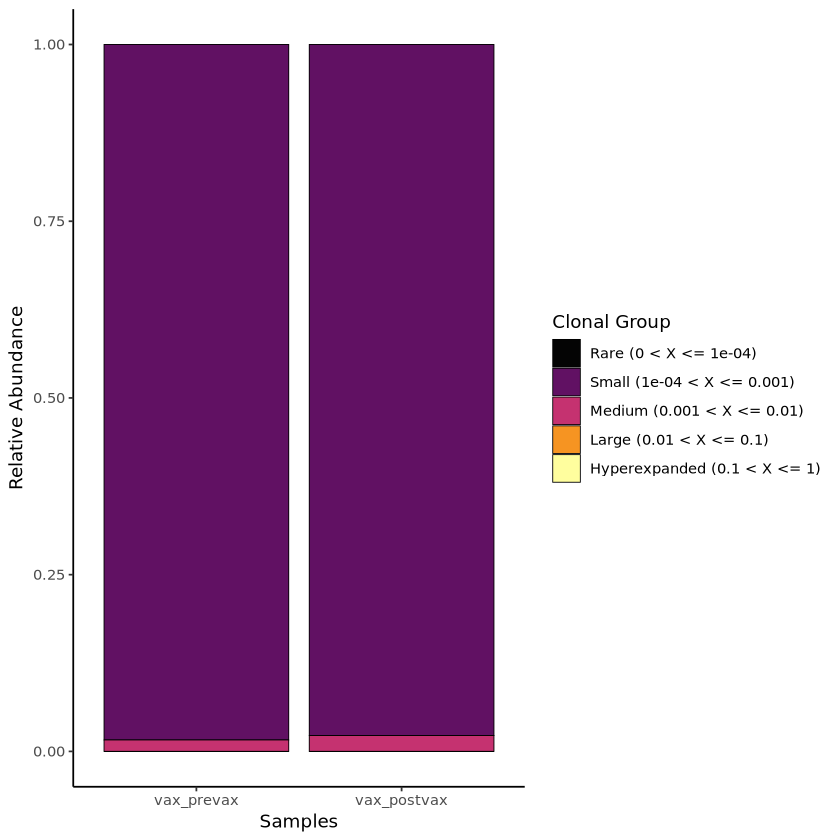

In [6]:
clonalHomeostasis(combined, 
                  cloneCall = "gene")

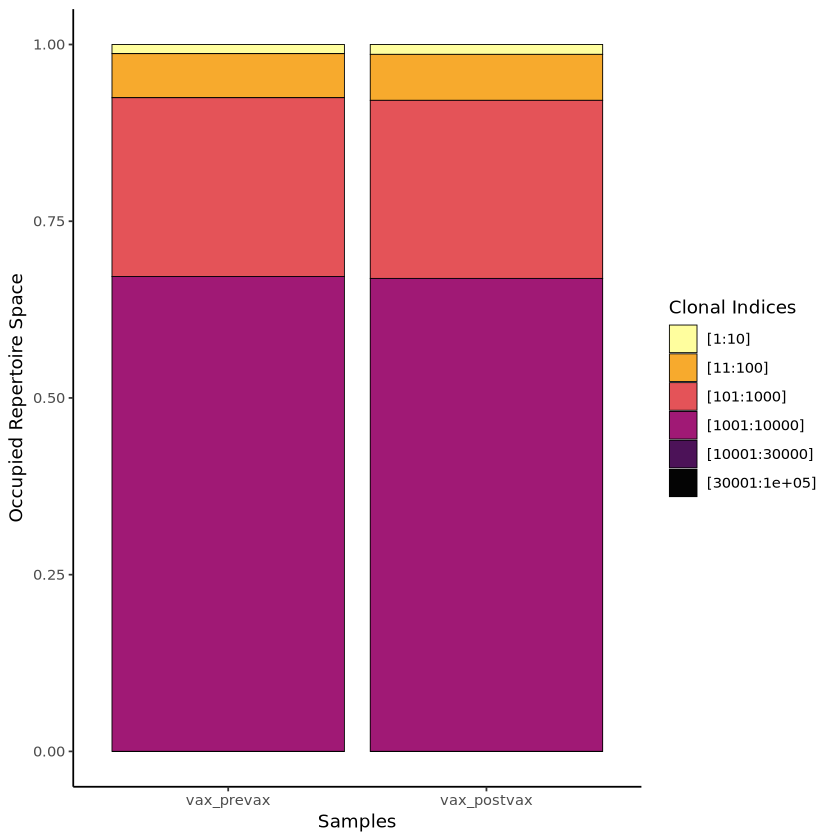

In [7]:
clonalProportion(combined, 
                 cloneCall = "gene") 

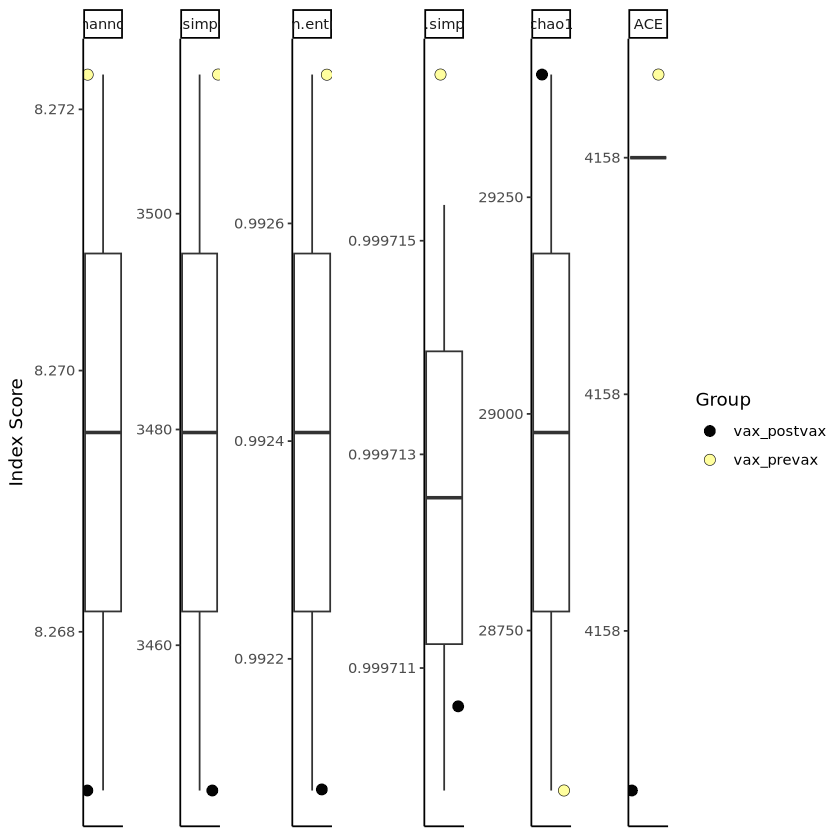

In [10]:
clonalDiversity(combined, 
                cloneCall = "gene")